In [1]:
from matplotlib.pyplot import *
from matplotlib import pyplot
import math
from scipy.optimize import *

In [2]:
pyplot.rcParams["figure.figsize"] = (20,10)

In [3]:
AcuityNumber = 10

In [4]:
class Section:
    
    def __init__(self,mode):
        self.mode = mode
        self.A_right = [0]*AcuityNumber
        self.A_total = [0]*AcuityNumber
        self.A_percent = [0]*AcuityNumber
        self.delay_dict_list = []
        self.delay_repeat = 0
        self.delay_percent_list = []
        
    def calcul_percent(self):
        for i in range(0,len(self.A_total)):
            if self.A_total[i] != 0:
                self.A_percent[i] = self.A_right[i] / self.A_total[i]
                
    def calcul_delay(self):
        itera = 0
        for delay_dict in self.delay_dict_list:
            self.delay_percent_list.append({})
            for elem in delay_dict:
                self.delay_percent_list[itera][elem] = self.delay_dict_list[itera][elem] / self.delay_repeat
            itera += 1
        

In [5]:
def sigmoid1(x):
    return 1 / (1 + math.exp(-x))

In [6]:
def sigmoid2(x, a, b):
    return 0.875 / (1.0 + np.exp(-a*(x-b))) + 0.125

$$f(x) = \frac {L}{1+e^{-k(x-x_0)}} + Base$$

In [7]:
def sigmoid3(x,a,b,c):
    return c / (1.0+np.exp(-a*(x-b))) +0.125

def cur_fit(y_data):
    popt, pcov = curve_fit(sigmoid2, range(0,len(y_data)), y_data)
    tpl, = plot(range(0,len(y_data)), sigmoid2(range(0,len(y_data)), *popt))
    print(popt)
    return tpl,popt

In [8]:
def cur_fit(y_data):
    popt, pcov = curve_fit(sigmoid3, range(0,len(y_data)), y_data)
    tpl, = plot(range(0,len(y_data)), sigmoid3(range(0,len(y_data)), *popt))
    print(popt)
    return tpl,popt

In [9]:
def percent_cal(k,x0,y):
    loge1dym1 = math.log((1/y)-1)
    return (loge1dym1)/(-k) + x0

In [10]:
path_name = "./data/"
file_name = "20190715103450_2.txt"

In [11]:
file = open(path_name+file_name,"r")
lines = file.readlines()

In [12]:
sections = []
temp_section = None
last_delay = 100
init_delay = 0.0
itera = -1
for line in lines:
    strings = line.split()
    if(len(strings) > 3):
        if(strings[1] == "start"):
            if(temp_section != None):
                sections.append(temp_section)
            temp_section = Section(strings[4])
        else:
            try:
                AZ = int(strings[3])
            except:
                AZ = -100
            if(AZ>=0):
                temp_section.A_total[AZ] += 1
                if(last_delay == init_delay and itera == 0):
                    temp_section.delay_repeat += 1
                if(strings[4] == "True"):
                    temp_section.A_right[AZ] += 1
                    if(len(temp_section.delay_dict_list) > 0):
                        if(not last_delay in temp_section.delay_dict_list[-1].keys()):
                            temp_section.delay_dict_list[-1][last_delay] = 1
                        else:
                            temp_section.delay_dict_list[-1][last_delay] += 1
            elif(AZ == -2):
                if(float(strings[4]) < last_delay):
                    itera += 1
                    temp_section.delay_dict_list.append({})
                last_delay = float(strings[4])
                if(temp_section.delay_repeat == 0):
                    init_delay = float(strings[4])
if(temp_section != None):
    sections.append(temp_section)

for section in sections:
    section.calcul_percent()
    
for section in sections:
    section.calcul_delay()
    
print(sections[-1].A_total[0])

0


for(section in sections):
    

In [13]:
def plot_acuity():
    i = -1
    legends = []
    plines = []
    for section in sections:
        i += 1
        tpl, = plot(range(0,AcuityNumber),sections[i].A_percent)
        plines.append(tpl)
        legends.append(sections[i].mode)
    #legends[-1] = "GazeShft"
    pyplot.legend(legends)
    #plines[0].remove()

In [14]:
for delay in sections[-1].delay_percent_list:
    print(delay.keys(),delay.values())

dict_keys([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) dict_values([0.6, 0.6, 0.6, 1.0, 0.6, 0.6])
dict_keys([0.0]) dict_values([0.2])
dict_keys([-0.61]) dict_values([0.6])
dict_keys([-1.21]) dict_values([1.0])
dict_keys([-1.82]) dict_values([0.8])
dict_keys([-2.42]) dict_values([0.4])
dict_keys([-3.03, 0.26]) dict_values([0.8, 0.6])
dict_keys([-0.04]) dict_values([0.6])
dict_keys([-0.34]) dict_values([0.4])
dict_keys([-0.65]) dict_values([0.8])
dict_keys([-0.95]) dict_values([0.6])
dict_keys([-1.25]) dict_values([0.8])


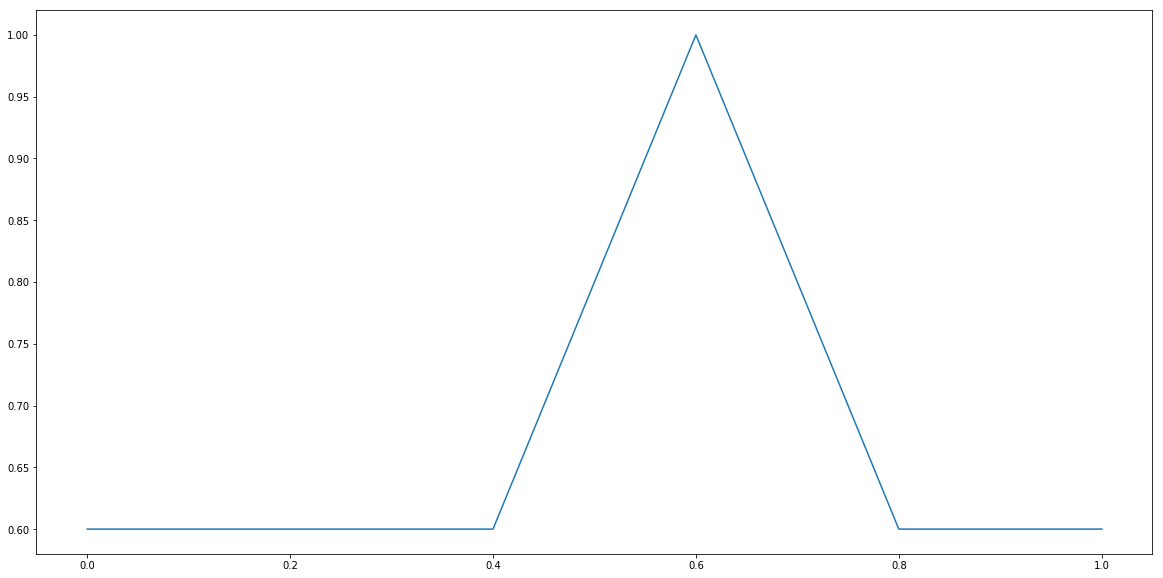

In [15]:
if(len(sections[-1].delay_percent_list) > 0):
    tpl, = plot(sections[-1].delay_percent_list[0].keys(),sections[-1].delay_percent_list[0].values())

[ 0.97716608 -1.35590682  0.57601318]


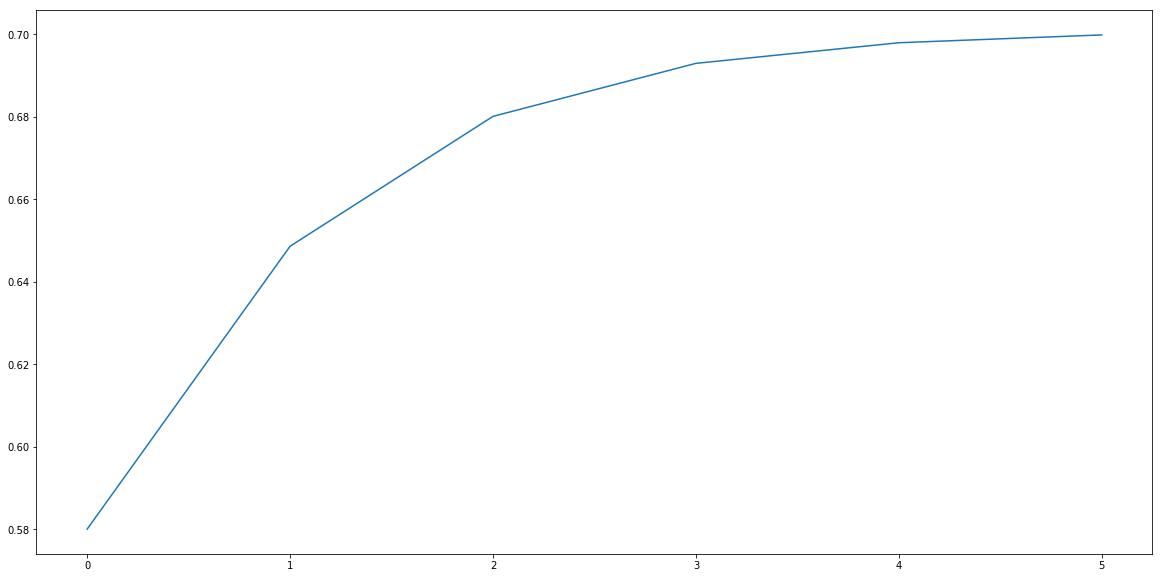

In [16]:
if(len(sections[-1].delay_percent_list) > 0):
    DF_tpl,DF_popt = cur_fit(list(sections[-1].delay_percent_list[0].values()))

In [17]:
def draw_compare_WYData(y_array,cur_popts):
    Precise = 0.1
    tpl, = plot(range(0,len(y_array)),y_array,".")
    cur_tpl, = plot(np.arange(0,len(y_array),Precise), sigmoid3(np.arange(0,len(y_array),Precise), *cur_popts))
    pyplot.savefig("./results/"+file_name[:-4]+"_DR"+".png")

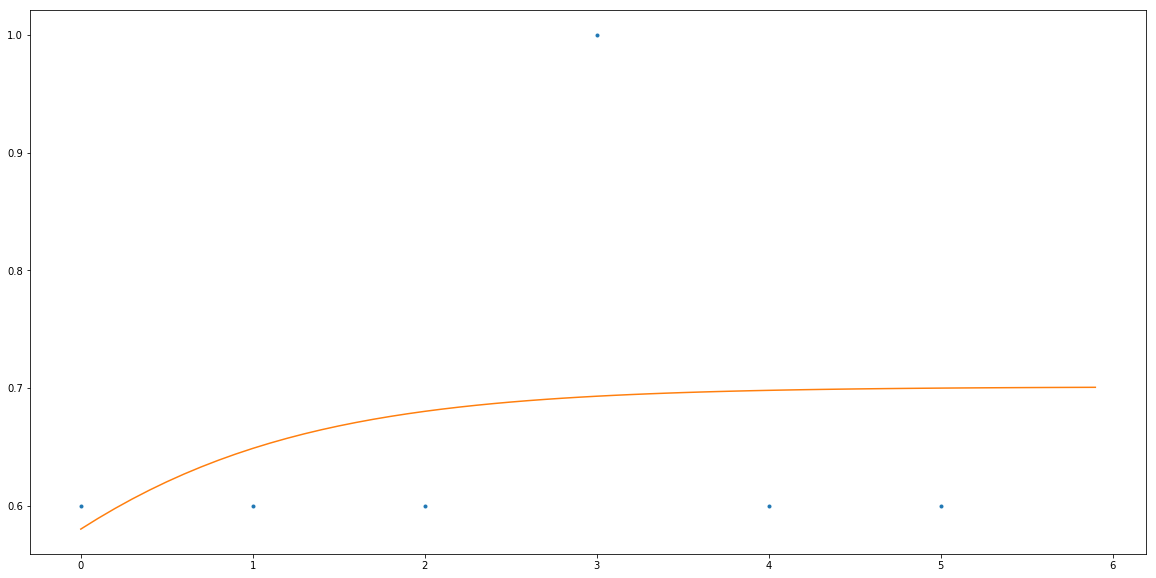

In [18]:
if(len(sections[-1].delay_percent_list) > 0):
    draw_compare_WYData(list(sections[-1].delay_percent_list[0].values()),DF_popt)

In [19]:
def plot_delay():
    i = 0
    legends = []
    plines = []
    for section in sections:
        for delay in section.delay_percent_list:
            tpl, = plot(delay.keys(),delay.values())
            plines.append(tpl)
            legends.append(i)
            i += 1
    pyplot.legend(legends)

PostDynamicAcuity
[29.29474152  1.68772977 -0.125     ]


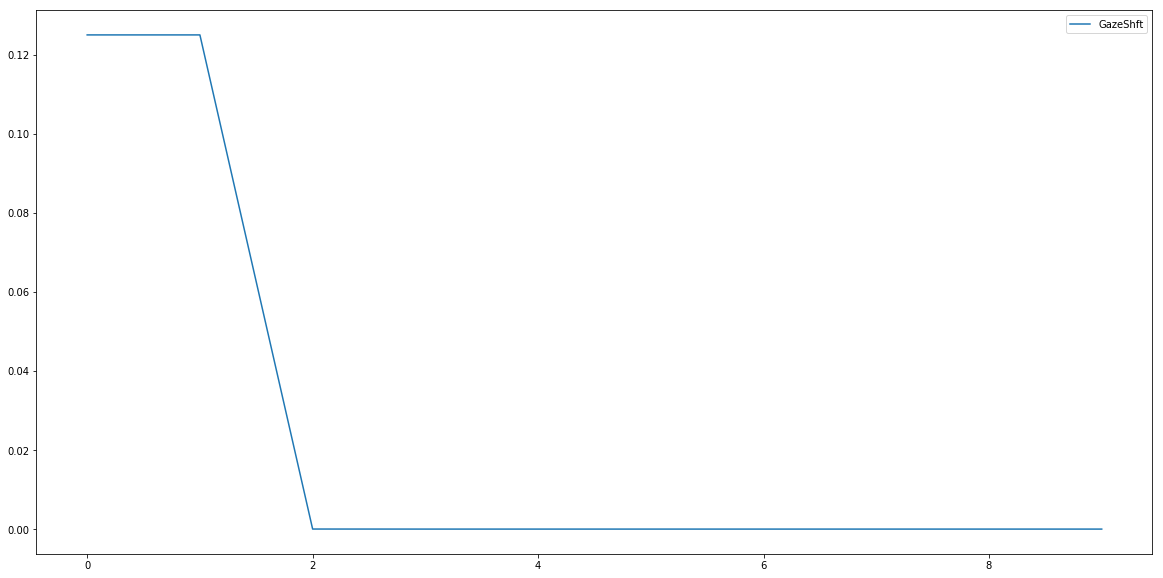

In [20]:
legends2 = []
plines = []
cur_popts = []
for section in sections:
    print(section.mode)
    legends2.append(section.mode)
    tlp,popt = cur_fit(section.A_percent)
    plines.append(tlp)
    cur_popts.append(popt)
legends2[-1] = "GazeShft"
pyplot.legend(legends2)
#plines[0].remove()

In [21]:
Precise = 0.1

def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid2(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])

In [22]:
def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid3(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])
    pyplot.savefig("./results/"+file_name[:-4]+"_AR"+str(index)+".png")

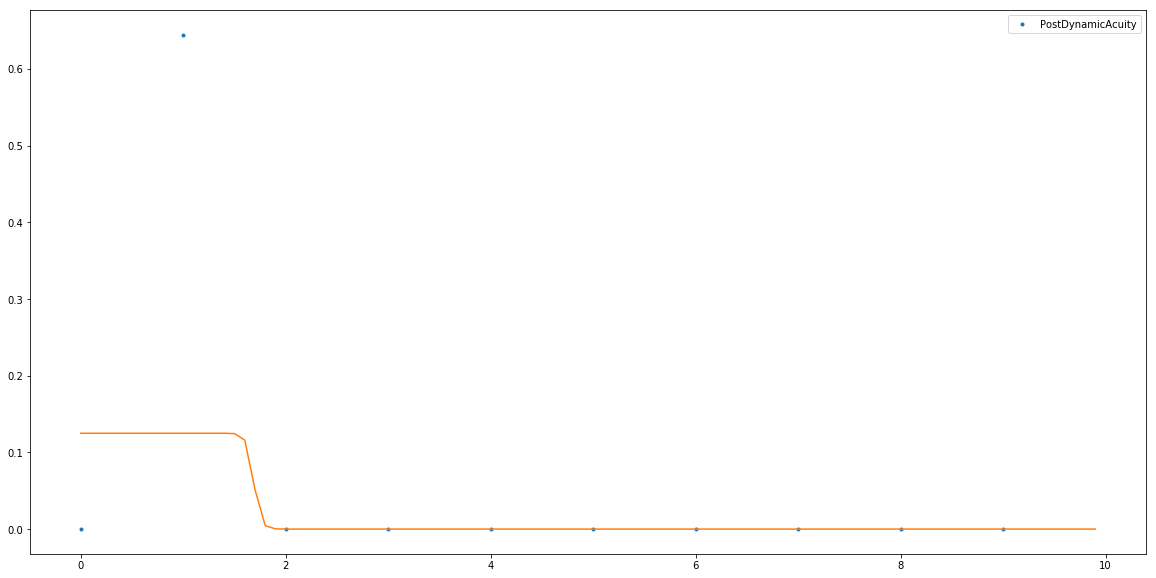

In [23]:
draw_compare(0)

In [24]:
draw_compare(1)

IndexError: list index out of range

In [ ]:
draw_compare(2)

In [ ]:
draw_compare(3)

In [ ]:
y = 0.8
print(percent_cal(1.27684543, 0.88405065 ,y))
print(percent_cal(2.44631207, 0.69156386 ,y))
print(percent_cal(3.20700723, 1.17558442 ,y))
print(percent_cal(0.75669271, 1.70771435 ,y))